In [0]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.utils import np_utils
import matplotlib.pyplot as plt

11493376/11490434 [==============================] - 0s 0us/step


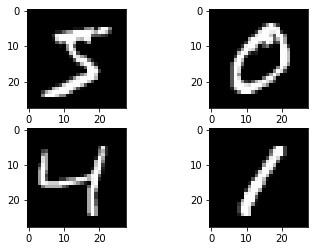

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=12, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/12
300/300 - 1s - loss: 0.2811 - accuracy: 0.9200 - val_loss: 0.1429 - val_accuracy: 0.9577
Epoch 2/12
300/300 - 1s - loss: 0.1110 - accuracy: 0.9681 - val_loss: 0.1086 - val_accuracy: 0.9662
Epoch 3/12
300/300 - 1s - loss: 0.0705 - accuracy: 0.9800 - val_loss: 0.0782 - val_accuracy: 0.9761
Epoch 4/12
300/300 - 1s - loss: 0.0504 - accuracy: 0.9858 - val_loss: 0.0677 - val_accuracy: 0.9804
Epoch 5/12
300/300 - 1s - loss: 0.0358 - accuracy: 0.9901 - val_loss: 0.0664 - val_accuracy: 0.9798
Epoch 6/12
300/300 - 1s - loss: 0.0268 - accuracy: 0.9932 - val_loss: 0.0619 - val_accuracy: 0.9800
Epoch 7/12
300/300 - 1s - loss: 0.0197 - accuracy: 0.9949 - val_loss: 0.0615 - val_accuracy: 0.9809
Epoch 8/12
300/300 - 1s - loss: 0.0148 - accuracy: 0.9964 - val_loss: 0.0601 - val_accuracy: 0.9808
Epoch 9/12
300/300 - 1s - loss: 0.0112 - accuracy: 0.9976 - val_loss: 0.0609 - val_accuracy: 0.9818
Epoch 10/12
300/300 - 1s - loss: 0.0088 - accuracy: 0.9981 - val_loss: 0.0617 - val_accuracy: 0.9810

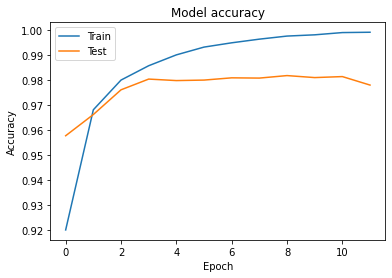

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
# Simple CNN for the MNIST Dataset
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.3))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 1s 5ms/step - loss: 0.2516 - accuracy: 0.9281 - val_loss: 0.0806 - val_accuracy: 0.9756
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0757 - accuracy: 0.9778 - val_loss: 0.0513 - val_accuracy: 0.9835
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0559 - accuracy: 0.9834 - val_loss: 0.0398 - val_accuracy: 0.9866
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0444 - accuracy: 0.9863 - val_loss: 0.0385 - val_accuracy: 0.9870
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0342 - val_accuracy: 0.9894
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0327 - val_accuracy: 0.9902
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0265 - accuracy: 0.9919 - val_loss: 0.0300 - val_accuracy: 0.9902
Epoch 

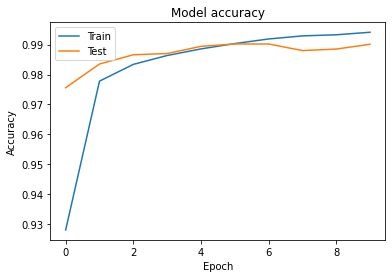

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
# Simple CNN for the MNIST Dataset
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

from sklearn.utils import shuffle
X_t,y_t=shuffle(X_train,y_train)

# define a simple CNN model
def baseline_model():
	# create model
    model = Sequential()
    model.add(Conv2D(40, (5, 5),padding='valid',input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(20, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(108, activation='relu'))
    model.add(Dense(54, activation='relu'))
    model.add(Dense(18, activation='sigmoid'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3851 - accuracy: 0.9189 - val_loss: 0.0848 - val_accuracy: 0.9805
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0928 - accuracy: 0.9767 - val_loss: 0.0478 - val_accuracy: 0.9875
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0678 - accuracy: 0.9815 - val_loss: 0.0432 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0535 - accuracy: 0.9853 - val_loss: 0.0380 - val_accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0502 - accuracy: 0.9855 - val_loss: 0.0318 - val_accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0427 - accuracy: 0.9877 - val_loss: 0.0310 - val_accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0369 - accuracy: 0.9891 - val_loss: 0.0307 - val_accuracy:

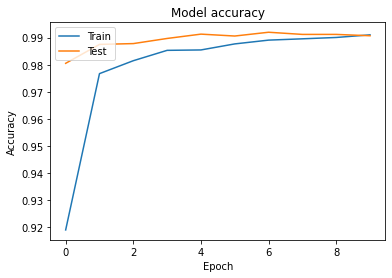

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.utils import np_utils
from sklearn.utils import shuffle
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
	# create model
    model = Sequential()
    model.add(Conv2D(64, (3,3),padding='valid',input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(108, activation='relu'))
    model.add(Dense(54, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(18, activation='sigmoid'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
# Fit the model
history=model.fit(X_t, y_t, validation_data=(X_test, y_test), epochs=25)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3569 - accuracy: 0.9324 - val_loss: 0.0876 - val_accuracy: 0.9812
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0828 - accuracy: 0.9806 - val_loss: 0.0496 - val_accuracy: 0.9884
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0561 - accuracy: 0.9864 - val_loss: 0.0481 - val_accuracy: 0.9878
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0457 - accuracy: 0.9881 - val_loss: 0.0361 - val_accuracy: 0.9901
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0352 - accuracy: 0.9910 - val_loss: 0.0469 - val_accuracy: 0.9879
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0295 - accuracy: 0.9923 - val_loss: 0.0339 - val_accuracy: 0.9916
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0281 - accuracy: 0.9925 - val_loss: 0.0334 - val_accuracy:

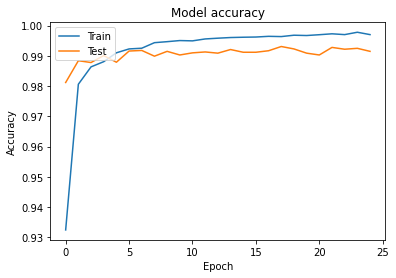

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()